In [ ]:
!pip install ucimlrepo

1. Explore dataset graph various features
2. Find 1 or 2 techniques that are deeper than class
3. Feature engineering
4. Model validation, try different models prove urs is the best
5. How we delt with over/underfitting

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [ ]:
X.shape

(101766, 47)

In [ ]:
y.shape

(101766, 1)

In [ ]:
X.head(5)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [ ]:
y.head(5)

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO


In [ ]:
y['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

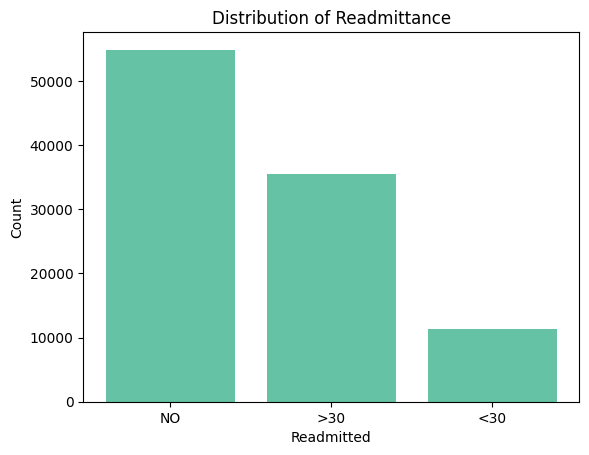

In [ ]:
data = y['readmitted'].value_counts()
# Convert the index to a list
categories = data.index.tolist()
sns.set_palette("Set2")
plt.bar(categories, data.values)
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Distribution of Readmittance')
plt.show()

In [ ]:
print(X['race'].unique())
print(X['age'].unique())
print(X['gender'].unique())

['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
['Female' 'Male' 'Unknown/Invalid']


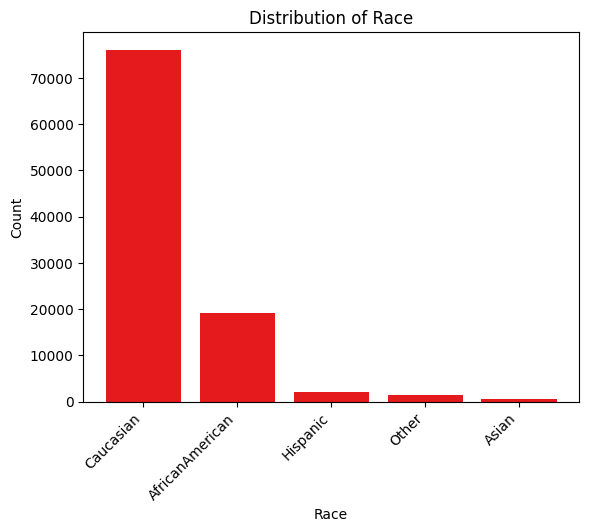

In [ ]:
data = X['race'].value_counts()
# Convert the index to a list
categories = data.index.tolist()
sns.set_palette("Set1")
plt.bar(categories, data.values)
plt.xlabel('Race')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Count')
plt.title('Distribution of Race')
plt.show()

In [ ]:
race_counts = X['race'].value_counts()
total_count = len(X['race'])

# Calculate percentages
race_percentages = (race_counts / total_count) * 100

# Display counts and percentages
print("Race Counts:")
print(race_counts)

print("\nRace Percentages:")
print(race_percentages)

Race Counts:
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Race Percentages:
Caucasian          74.778413
AfricanAmerican    18.876639
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: race, dtype: float64


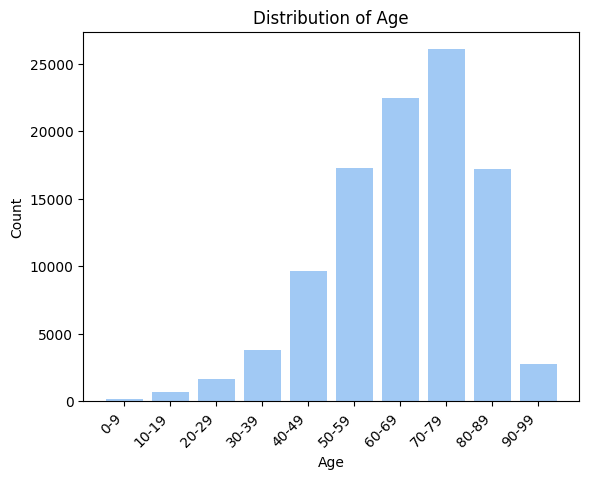

In [ ]:
age_mapping = {
    '[0-10)': '0-9',
    '[10-20)': '10-19',
    '[20-30)': '20-29',
    '[30-40)': '30-39',
    '[40-50)': '40-49',
    '[50-60)': '50-59',
    '[60-70)': '60-69',
    '[70-80)': '70-79',
    '[80-90)': '80-89',
    '[90-100)': '90-99'
}
# Create a copy of the DataFrame
X_copy = X.copy()

# Apply the mapping to the 'age' column using .loc on the copied DataFrame
X_copy.loc[:, 'age_mapped'] = X_copy['age'].map(age_mapping)
categories_order = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

data = X_copy['age_mapped'].value_counts().sort_index()
data = data.reindex(categories_order)
# Convert the index to a list
categories = data.index.tolist()
sns.set_palette("pastel")
plt.bar(categories, data.values)
plt.xlabel('Age')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [ ]:
age_mapped_counts = X_copy['age_mapped'].value_counts()
total_count = len(X_copy['age_mapped'])
age_mapped_percentages = (age_mapped_counts / total_count) * 100

# Display counts and percentages for the mapped ages
print("Mapped Age Counts:")
print(age_mapped_counts)

print("\nMapped Age Percentages:")
print(age_mapped_percentages)

Mapped Age Counts:
70-79    26068
60-69    22483
50-59    17256
80-89    17197
40-49     9685
30-39     3775
90-99     2793
20-29     1657
10-19      691
0-9        161
Name: age_mapped, dtype: int64

Mapped Age Percentages:
70-79    25.615628
60-69    22.092840
50-59    16.956547
80-89    16.898571
40-49     9.516931
30-39     3.709490
90-99     2.744532
20-29     1.628245
10-19     0.679009
0-9       0.158206
Name: age_mapped, dtype: float64


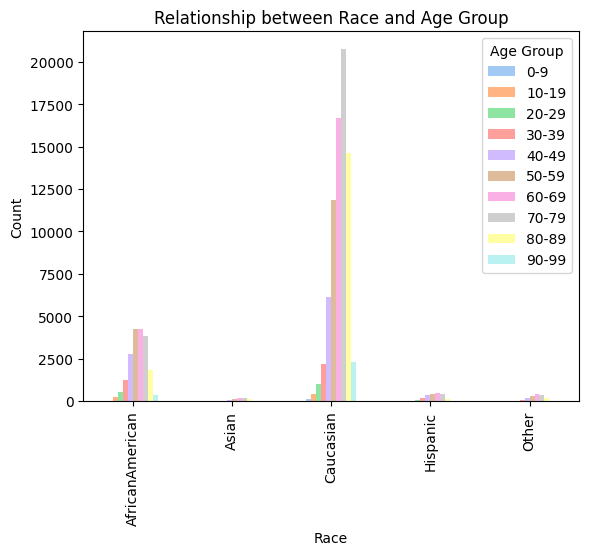

In [ ]:
# Create a contingency table
cross_table = pd.crosstab(X['race'], X_copy['age_mapped'])

# Plot the bar plot
cross_table.plot(kind='bar', stacked=False)

# Customize the plot
plt.title('Relationship between Race and Age Group')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Age Group')

# Show the plot
plt.show()


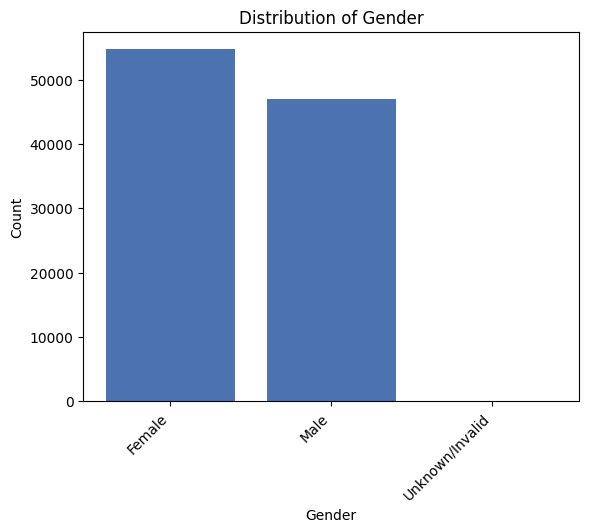

In [ ]:
data = X['gender'].value_counts()
# Convert the index to a list
categories = data.index.tolist()
sns.set_palette("deep")
plt.bar(categories, data.values)
plt.xlabel('Gender')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

In [ ]:
gender_counts = X['gender'].value_counts()
total_count = len(X['gender'])

# Calculate percentages
gender_percentages = (gender_counts / total_count) * 100

# Display counts and percentages
print("Gender Counts:")
print(gender_counts)

print("\nGender Percentages:")
print(gender_percentages)

Gender Counts:
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

Gender Percentages:
Female             53.758623
Male               46.238429
Unknown/Invalid     0.002948
Name: gender, dtype: float64


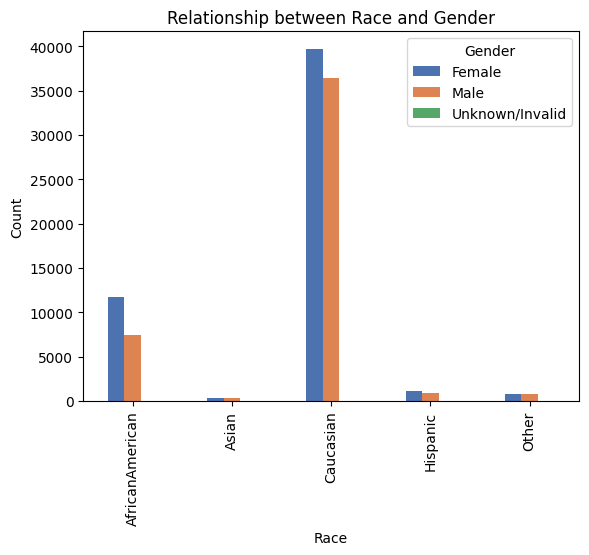

In [ ]:
cross_table = pd.crosstab(X['race'], X['gender'])

cross_table.plot(kind='bar', stacked=False)

plt.title('Relationship between Race and Gender')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Gender')

# Show the plot
plt.show()

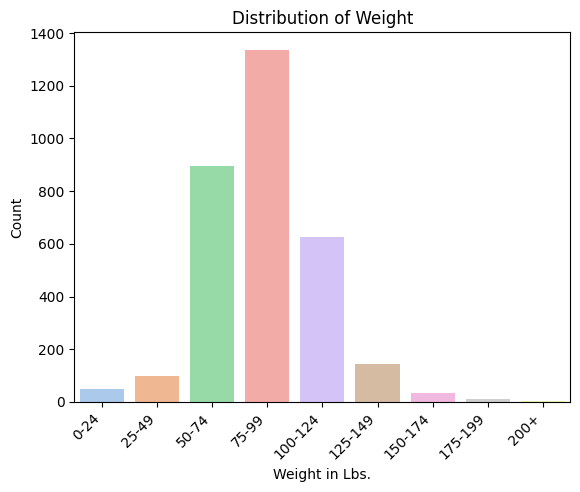

In [ ]:
weight_mapping = {
    '[0-25)': '0-24',
    '[25-50)': '25-49',
    '[50-75)': '50-74',
    '[75-100)': '75-99',
    '[100-125)': '100-124',
    '[125-150)': '125-149',
    '[150-175)': '150-174',
    '[175-200)': '175-199',
    '>200': '200+'
}

X_copy.loc[:, 'weight_mapped'] = X_copy['weight'].map(weight_mapping)

data = X_copy['weight_mapped'].value_counts().sort_index()

# Convert the index to a list to use as the order
categories_order = ['0-24', '25-49', '50-74', '75-99', '100-124', '125-149', '150-174', '175-199', '200+']
data = data.reindex(categories_order)

# Create a bar plot with the specified order
sns.set_palette("pastel")
sns.barplot(x=categories_order, y=data.values, order=categories_order)

plt.xlabel('Weight in Lbs.')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Count')
plt.title('Distribution of Weight')
plt.show()

In [ ]:
weight_mapped_counts = X_copy['weight'].value_counts()
total_count_weight = len(X_copy['weight'])
weight_mapped_percentages = (weight_mapped_counts / total_count_weight) * 100

# Display counts and percentages for the mapped weights
print("Mapped Weight Counts:")
print(weight_mapped_counts)

print("\nMapped Weight Percentages:")
print(weight_mapped_percentages)

Mapped Weight Counts:
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

Mapped Weight Percentages:
[75-100)     1.312816
[50-75)      0.881434
[100-125)    0.614154
[125-150)    0.142484
[25-50)      0.095317
[0-25)       0.047167
[150-175)    0.034393
[175-200)    0.010809
>200         0.002948
Name: weight, dtype: float64


In [ ]:
X.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [ ]:
# Create an empty DataFrame to store the summary statistics
summary_df = pd.DataFrame(columns=['Column', 'Max', 'Min', 'Std', 'Mean', 'Median'])

# Assuming your DataFrame is named X
for column in X.columns:
    if np.issubdtype(X[column].dtype, np.number):
        column_values = X[column].dropna()  # Drop NaN values for calculation
        max_value = column_values.max()
        min_value = column_values.min()
        std_value = column_values.std()
        mean_value = column_values.mean()
        median_value = column_values.median()

        # Append the summary statistics to the new DataFrame
        summary_df = pd.concat([summary_df, pd.DataFrame({
            'Column': [column],
            'Max': [max_value],
            'Min': [min_value],
            'Std': [std_value],
            'Mean': [mean_value],
            'Median': [median_value]
        })], ignore_index=True)

# Display the summary DataFrame
print(summary_df)


                      Column  Max Min        Std       Mean  Median
0          admission_type_id    8   1   1.445403   2.024006     1.0
1   discharge_disposition_id   28   1   5.280166   3.715642     1.0
2        admission_source_id   25   1   4.064081   5.754437     7.0
3           time_in_hospital   14   1   2.985108   4.395987     4.0
4         num_lab_procedures  132   1  19.674362  43.095641    44.0
5             num_procedures    6   0   1.705807   1.339730     1.0
6            num_medications   81   1   8.127566  16.021844    15.0
7          number_outpatient   42   0   1.267265   0.369357     0.0
8           number_emergency   76   0   0.930472   0.197836     0.0
9           number_inpatient   21   0   1.262863   0.635566     0.0
10          number_diagnoses   16   1   1.933600   7.422607     8.0


In [ ]:
non_numeric_summary_df = pd.DataFrame(columns=['Column', 'Value Counts'])

for column in X.columns:
    if not np.issubdtype(X[column].dtype, np.number):
        value_counts = X[column].value_counts()

        non_numeric_summary_df = pd.concat([non_numeric_summary_df, pd.DataFrame({
            'Column': [column],
            'Value Counts': [value_counts]
        })], ignore_index=True)

# Display the summary DataFrame for non-numeric columns
non_numeric_summary_df

,Column,Value Counts
0,race,Caucasian 76099 AfricanAmerican 19...
1,gender,Female 54708 Male 47...
2,age,[70-80) 26068 [60-70) 22483 [50-60) ...
3,weight,[75-100) 1336 [50-75) 897 [100-125) ...
4,payer_code,MC 32439 HM 6274 SP 5007 BC 465...
5,medical_specialty,InternalMedicine 14635 Emer...
6,diag_1,428 6862 414 6581 786 4016 410 361...
7,diag_2,276 6752 428 6662 250 6071 427 ...
8,diag_3,250 11555 401 8289 276 5175 428 ...
9,max_glu_serum,None 96420 Norm 2597 >200 1485 >300...


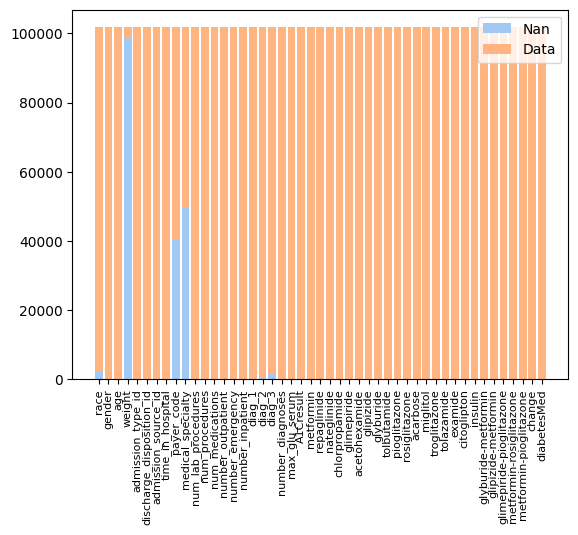

In [ ]:
# Proportion of missing data by feature
features = list(np.array((X.columns)).flatten())
plt.bar(features, list(X.isna().sum()), label="Nan")
plt.bar(features, list(X.count()), bottom=list(X.isna().sum()), label="Data")
plt.legend()
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=8)

In [78]:
inds = []
for i,x in enumerate(list(X.isna().sum())):
  if x != 0:
    inds.append(i)

nans = []
vals = []
feats = []
for i in inds:
  nans.append(list(X.isna().sum())[i])
  vals.append(list(X.count())[i])
  feats.append(features[i])


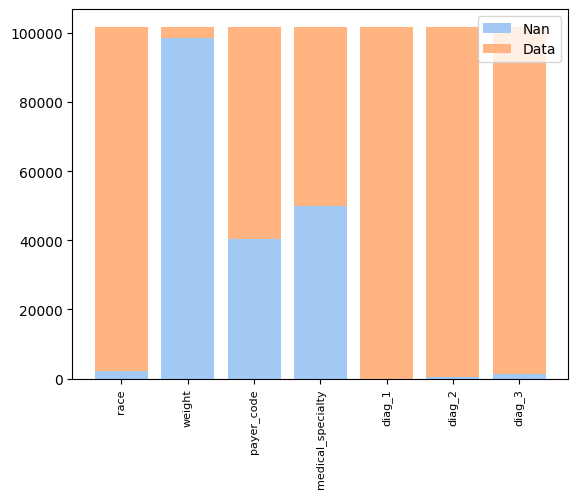

In [80]:
plt.bar(feats, nans, label="Nan")
plt.bar(feats, vals, bottom=nans, label="Data")
plt.legend()
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=8)

Feature Engineering